# Środowiska uruchomieniowe C3. Streamlit 2.
#### Celem tego ćwiczenia jest przedstawienie w uproszczeniu procesu trenowania kilku podstawowych modeli ML. Wykorzystamy słynny zbiór danych z Kaggle - Titanic - Machine Learning from Disaster. Więcej informacji o tych danych można znaleźć na stronie internetowej - https://www.kaggle.com/c/titanic/data 

### 1. Import bibliotek

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 2. Przygotowanie danych do analizy

In [4]:
os.getcwd()

'C:\\Users\\saras\\Documents\\SUML_cw2'

In [5]:
base_data = pd.read_csv("dane2.csv",sep=";");
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych

cols = ["objawy","wiek","choroby","wzrost","zdrowie",]
data = base_data[cols].copy()
# tworzymy kopię naszych danych bez zbędnych kolumn (np. PassengerID i Name)

In [6]:
print(data)

    objawy  wiek  choroby  wzrost  zdrowie
0        1   NaN        0   170.0        0
1        1  65.0        0     NaN        0
2        1  55.0        0   182.0        0
3        1  44.0        0   187.0        0
4        1  77.0        0   165.0        0
5        1  64.0        0   164.0        0
6        2  54.0        1   178.0        0
7        1   NaN        1   190.0        0
8        1  76.0        1   200.0        0
9        2  54.0        0   198.0        0
10       3  56.0        0   187.0        0
11       1  68.0        0   167.0        0
12       3   NaN        1   168.0        0
13       2  55.0        1   189.0        0
14       1  44.0        1   177.0        0
15       2  43.0        1   166.0        0
16       2  32.0        1   188.0        0
17       3  23.0        1   198.0        0
18       2  42.0        0   176.0        0
19       3   NaN        0   167.0        0
20       2  11.0        0   159.0        0
21       1  21.0        0   198.0        0
22       4 

In [7]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

objawy     False
wiek        True
choroby    False
wzrost      True
zdrowie    False
dtype: bool

#### Możemy wygenerować mapę ciepła symbolizującą braki danych - każdy "pomarańczowy pasek" to miejsce, w którym jest brak danych

<AxesSubplot:>

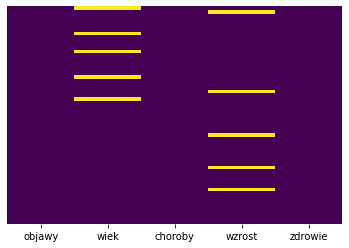

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# cbar ustalamy jako false, ponieważ nie wniesie nam to dodatkowych informacji

#### Już po tej prostej wizualizacji widzimy, że mamy dużo przypadków brakujących danych odnoszących się do wieku. Brakujące dane odnośnie wieku możemy zastąpić średnią.

In [9]:
# Transformations and additions
data["wiek"].fillna((data["wiek"].mean()), inplace=True) # wypełni nam brakujące informacje średnią
data["wzrost"].fillna((data["wzrost"].mean()), inplace=True) # wypełni nam brakujące informacje średnią

In [10]:
data.isnull().any()

objawy     False
wiek       False
choroby    False
wzrost     False
zdrowie    False
dtype: bool

In [11]:
print(data)

    objawy       wiek  choroby      wzrost  zdrowie
0        1  44.163636        0  170.000000        0
1        1  65.000000        0  183.345455        0
2        1  55.000000        0  182.000000        0
3        1  44.000000        0  187.000000        0
4        1  77.000000        0  165.000000        0
5        1  64.000000        0  164.000000        0
6        2  54.000000        1  178.000000        0
7        1  44.163636        1  190.000000        0
8        1  76.000000        1  200.000000        0
9        2  54.000000        0  198.000000        0
10       3  56.000000        0  187.000000        0
11       1  68.000000        0  167.000000        0
12       3  44.163636        1  168.000000        0
13       2  55.000000        1  189.000000        0
14       1  44.000000        1  177.000000        0
15       2  43.000000        1  166.000000        0
16       2  32.000000        1  188.000000        0
17       3  23.000000        1  198.000000        0
18       2  

#### Zanim przejdziemy dalej musimy jeszcze zadbać o właściwe nazewnictwo zmiennych. W naszej bazie danych mamy na razie informację w postaci Stringów - np. płeć jest oznaczona jako male lub female. Musimy to naprawić za pomocą "dumy variable". Zamienimy je automatycznie na wartości np. 1 będzie dla mężczyzn. Przczytaj o tym więcej: https://pl.wikipedia.org/wiki/Dummy_coding

In [ ]:
encoder = LabelEncoder()
data.loc[:,"Sex"] = encoder.fit_transform(data.loc[:,"Sex"])
# male = 1, female = 0

encoder = LabelEncoder()
data.loc[:,"Embarked"] = encoder.fit_transform(data.loc[:,"Embarked"])

In [ ]:
print(data)

### 3. Eksploracja danych

<AxesSubplot:xlabel='zdrowie', ylabel='count'>

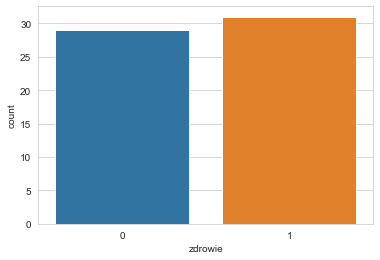

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='zdrowie',data=data)
# używamy biblioteki seaborn do stworzenia prostego wykresu symbolizującego osoby, które przeżyły (1) i nie przeżyły (0)

<AxesSubplot:xlabel='zdrowie', ylabel='count'>

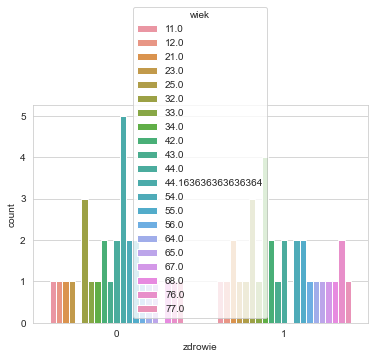

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='zdrowie',hue='wiek',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

<AxesSubplot:xlabel='wiek', ylabel='choroby'>

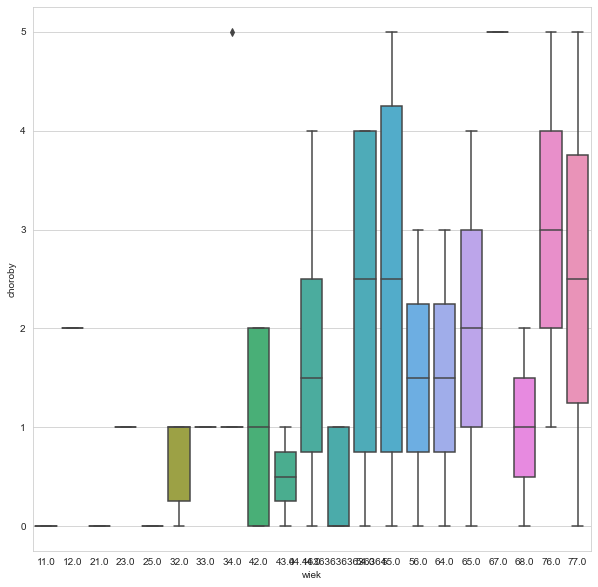

In [13]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='wiek',y='choroby',data=data)
# wygenerujemy sobie boxplot, czyli wykres skrzynkowy dla wieku oraz klasy pasażerów

In [43]:
print(data)

    objawy       wiek  choroby      wzrost  zdrowie
0        1  44.163636        0  170.000000        0
1        1  65.000000        0  183.345455        0
2        1  55.000000        0  182.000000        0
3        1  44.000000        0  187.000000        0
4        1  77.000000        0  165.000000        0
5        1  64.000000        0  164.000000        0
6        2  54.000000        1  178.000000        0
7        1  44.163636        1  190.000000        0
8        1  76.000000        1  200.000000        0
9        2  54.000000        0  198.000000        0
10       3  56.000000        0  187.000000        0
11       1  68.000000        0  167.000000        0
12       3  44.163636        1  168.000000        0
13       2  55.000000        1  189.000000        0
14       1  44.000000        1  177.000000        0
15       2  43.000000        1  166.000000        0
16       2  32.000000        1  188.000000        0
17       3  23.000000        1  198.000000        0
18       2  

### 4. Trenowanie modelu

In [44]:
y = data.iloc[:,4] # survived - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,0:4] # zmienne na podstawie, których chcemy przewidzieć
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu

In [45]:
def model(X_train, y_train):
    
    forest = RandomForestClassifier( n_estimators=10, random_state=0)
    forest.fit(X_train,y_train)
    print("Las: {0}".format(forest.score(X_train,y_train)) )
    
    lreg =LogisticRegression()
    lreg.fit(X_train,y_train)
    print("Regresja logistyczna: {0}".format(lreg.score(X_train,y_train)) )
  
    tree =DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    print("Drzewa decyzyjne: {0}".format(tree.score(X_train,y_train)) )
   
    return forest, lreg, tree

forest, lreg, tree = model(X_train,y_train)

Las: 0.9791666666666666
Regresja logistyczna: 0.9375
Drzewa decyzyjne: 1.0


In [46]:
target_names=["Healthy","Ill"]

y1_predict = forest.predict(X_test)
print("Random Forest {0}".format(accuracy_score(y_test, y1_predict)))

y2_predict = lreg.predict(X_test)
print("Logistic Regresion {0}".format(accuracy_score(y_test, y2_predict)))

y3_predict = tree.predict(X_test)
print("Decision Tree {0}".format(accuracy_score(y_test, y3_predict)))

# uzyskujemy dzięki temu informacje dotyczącą dokładności modelu 

Random Forest 0.8333333333333334
Logistic Regresion 0.8333333333333334
Decision Tree 0.75


In [47]:
print("Ocena modelu 2. Las")
print(classification_report(y_test,y1_predict))
# uzyskujemy informację o precyzji, recall, f1, etc.
# te wszystkie dane przydadzą się nam do oceny naszego modelu

Ocena modelu 2. Las
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.71      1.00      0.83         5

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



print("Ocena modelu 1. Regresja logistyczna")
print(classification_report(y_test,y2_predict))

In [48]:
print("Ocena modelu 2. Drzewa decyzyjne")
print(classification_report(y_test,y3_predict))

Ocena modelu 2. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.67      0.80      0.73         5

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



In [49]:
print("Ocena modelu 2. Regresja")
print(classification_report(y_test,y2_predict))

Ocena modelu 2. Regresja
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.71      1.00      0.83         5

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



### 5. Eksport modelu

#### Widzimy, że najlepszymi parametrami cechuje się model pierwszy. Eksportujemy go do pickle.

In [50]:
filename = "model.sv"
pickle.dump(lreg, open(filename,'wb'))

### 6. Inne

#### Możemy się jeszcze chwilę pobawić i sprawdzić czy np. osoba z klasy pasażerskiej 1, będąca mężczyzną w wieku 50 lat, nieposiadająca innych członków rodziny, itd. przeżyłaby podróż. Odczytujemy wynik i widzimy, że niestety nie przeżyłaby podróży. Do porównania drugi przykład (kobieta w wieku 20 lat) - model podpowiada nam, że ta osoba przeżyłaby podróż.

In [2]:
my_data =[
            [
             1,  #"objawy"
             19,  #"wiek"
             1,  #"choroby"
             170,  #"wzrost"
    ]
]

lreg.predict(my_data)

NameError: name 'lreg' is not defined

In [60]:
my_data =[
            [
             1,  #"objawy"
             79,  #"wiek"
             4,  #"choroby"
             180,  #"wzrost"
    ]
]

lreg.predict(my_data)

C:\Users\saras\anaconda3\envs\SUML2\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

##### Źródło danych [https://www.kaggle.com/c/titanic/](https://www.kaggle.com/c/titanic), zastosowanie przez Adama Ramblinga